<a href="https://colab.research.google.com/github/RuslanMavlitov/IDE/blob/master/Practice_K_Means_%26_EM_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics

In [3]:
df = pd.read_csv('/content/sample_data/snsdata.zip')
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


gradyear — год выпуска;

gender — пол;

age — возраст;

friends — число друзей в социальной сети;

basketball, football, soccer, softball, volleyball, swimming, cheerleading, baseball, tennis, sports, cute, sex, sexy, hot, kissed, dance, band, marching, music, rock, god, church, jesus, bible, hair, dress, blonde, mall, shopping, clothes, hollister, abercrombiedie, death, drunk, drugs (переменные с пятой по сороковую) — частота встречаемости соответствующих слов в сообщениях подростка.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

##Задание 4.1
Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка. Удалите все остальные признаки. Какова размерность вашего текущего набора данных?

In [5]:
df = df.iloc[:, 4:]
df.shape

(30000, 36)

##Задание 4.2

Теперь нормализуйте данные с помощью StandardScaler(). Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Ответ округлите до двух знаков после точки-разделителя.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(df)
X_norm[0][0]

-0.3322172643985876

##Задание 4.3

Реализуйте алгоритм k-means c девятью кластерами. В качестве значения параметра random_state возьмите число 42. Выведите получившееся значение инерции (model.inertia_). Ответ округлите до двух знаков после точки-разделителя.

In [8]:
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(X_norm)
kmeans.inertia_

857169.1033997971

##Задание 4.4

Сколько подростков относится к наиболее многочисленному кластеру?

In [11]:
df['labels'] = kmeans.labels_

In [12]:
df['labels'].value_counts()

0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
Name: labels, dtype: int64

##Задание 4.5

1. Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Давайте попробуем применить разные методы для нахождения числа кластеров. Будем выбирать количество кластеров из диапазона от 3 до 9.

Для начала примените метод локтя. Каким в этом случае будет оптимальное число кластеров? Если оно не идентифицируется однозначно, запишите количество кластеров с наименьшей инерцией.

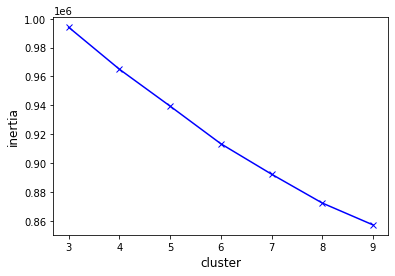

In [13]:
def get_inertia(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia
 
inertia = []
for cluster_num in range(3, 10):
    inertia.append(get_inertia(cluster_num, X_norm))
 
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
plt.plot([i for i in range(3, 10)], inertia, 'xb-');

Инерция при переборе гипперпараметра "n_clusters" от 3 до 9 уменьшалась линейно, без перегибов. Нужно увеличиваать количество кластеров дальше, или попробовать "коэффициент силуэта".

2. Теперь попробуйте подобрать оптимальное количество кластеров с помощью коэффициента силуэта. Каким оно будет?

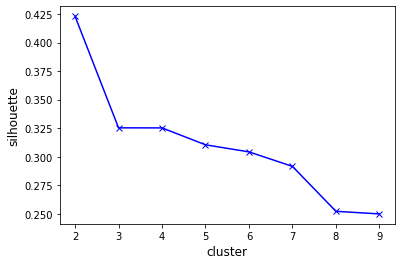

In [14]:
def get_silhouette(cluster_num, df):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(df)
    silhouette = silhouette_score(df, k_means.labels_, metric='euclidean')
    return silhouette

from sklearn.metrics import silhouette_score

silhouettes = []
for i in range(2, 10):
    silhouettes.append(get_silhouette(i ,X_norm))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouettes, 'xb-')

##Задание 4.6

Опираясь на коэффициент силуэта, реализуйте сегментацию подростков на выбранном количестве кластеров.

Отметьте ключевые слова, характерные для каждого из трёх выделенных кластеров:

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)
df['labels'] = kmeans.labels_

for label, group in df.groupby('labels'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    print(means.head(10))

music         1.055406
dance         0.998484
shopping      0.939205
god           0.886325
cute          0.798417
hair          0.736948
church        0.670428
basketball    0.661839
mall          0.658976
football      0.590603
dtype: float64
hair      3.223894
sex       2.430088
music     2.262832
kissed    1.575221
die       1.211504
rock      1.115044
god       0.998230
band      0.973451
drugs     0.955752
dance     0.951327
dtype: float64
music       0.580455
god         0.330019
dance       0.250785
band        0.243328
hair        0.203122
shopping    0.190563
cute        0.180490
rock        0.164486
soccer      0.152189
football    0.151361
dtype: float64


##Задание 4.7

Итак, с k-means мы потренировались — теперь перейдём к EM-алгоритму.

Реализуйте EM-алгоритм (GaussianMixture) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра random_state возьмите число 42.

Сколько подростков алгоритм отнёс к самому многочисленному кластеру?

In [19]:
model = GaussianMixture(n_components=3, random_state=42)
predictions = model.fit_predict(X_norm)
np.unique(predictions, return_counts=True)

(array([0, 1, 2]), array([23426,  6573,     1]))

##Задание 4.8

В одном из кластеров оказался всего один человек. Давайте узнаем, что это за подросток и чем он(а) интересуется.

Отметьте три слова, которые чаще всего встречаются в сообщениях этого подростка:

In [24]:
a = np.where(predictions == 2)
b = df.iloc[a]
b.max()

basketball        0
football          2
soccer            0
softball          0
volleyball        0
swimming          1
cheerleading      0
baseball          0
tennis            0
sports            0
cute              1
sex              22
sexy              1
hot               0
kissed            0
dance             1
band              1
marching          0
music             0
rock              1
god              10
church            0
jesus             1
bible             0
hair             12
dress             2
blonde          327
mall              0
shopping          0
clothes           1
hollister         0
abercrombie       0
die               6
death             6
drunk             6
drugs             0
labels            1
dtype: int64